In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# load data
df = pd.read_csv('experiment_results.csv')
df.columns

df['error_mean'] = (np.rad2deg(df['error_s1']) + np.rad2deg(df['error_s2'])) / 2
df['dist_s1_s2'] = np.rad2deg(np.abs(df['doas_ref_s1_az'] - df['doas_ref_s2_az']))
df.columns  

Index(['target_doa', 'interf_doa', 'duration', 'snr', 'noise_type',
       'add_reverberation', 'loc_method', 'sv_method', 'nObs', 'seed',
       'sv_normalization', 'doas_est_idx_s1', 'doas_est_idx_s2',
       'doas_ref_idx_s1', 'doas_ref_idx_s2', 'doas_ref_s1_az',
       'doas_ref_s1_el', 'doas_ref_s2_az', 'doas_ref_s2_el', 'doas_est_s1_az',
       'doas_est_s1_el', 'doas_est_s2_az', 'doas_est_s2_el', 'error_s1',
       'error_s2', 'time', 'exp_name', 'error_mean', 'dist_s1_s2'],
      dtype='object')

In [8]:
df[df['sv_method'].isin(['gp-steerer', 'ref', 'alg'])].pivot_table(
        values='error_mean', 
        index=['sv_method', 'nObs', 'snr', 'duration'], 
        columns='loc_method', 
        aggfunc='mean'
).style.background_gradient(cmap='viridis', axis=1)

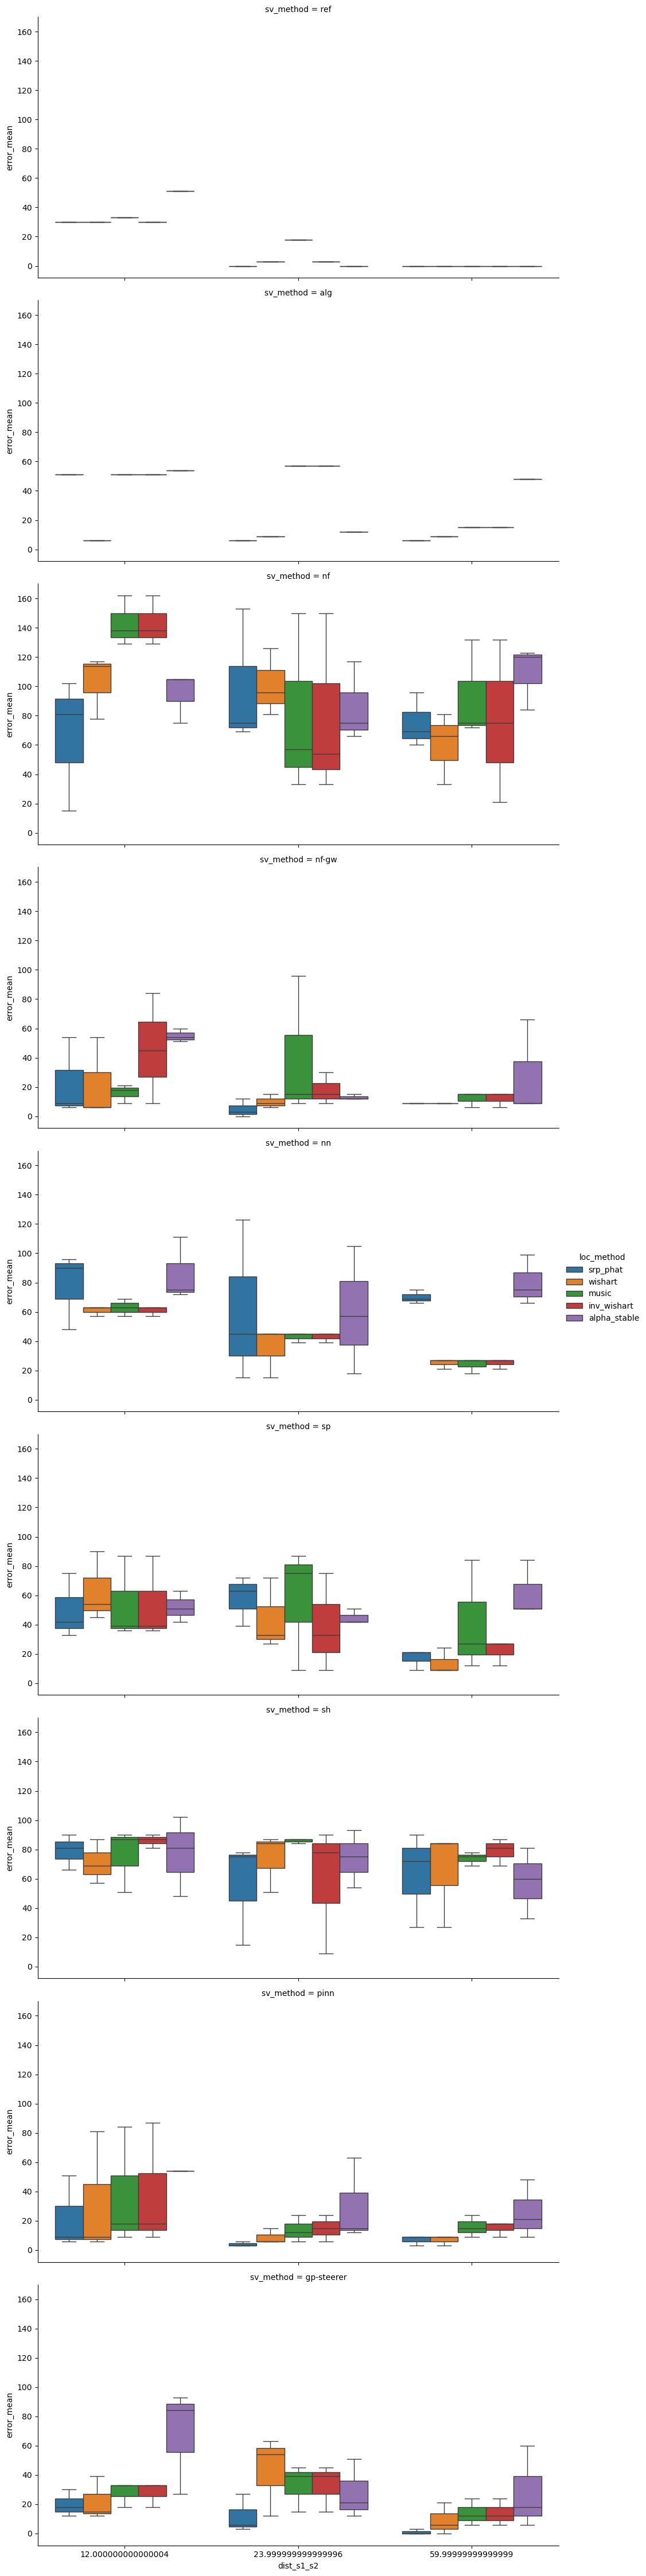

In [14]:
curr_df =  df[(df['snr'] == 10) & (df['nObs'] == 8) & (df['duration'] == 1)]
sns.catplot(x='dist_s1_s2', y='error_mean', hue='loc_method', data=curr_df, kind='box', aspect=2, row='sv_method')